In [1]:
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn import metrics
from sklearn.decomposition import PCA

import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
from matplotlib import figure
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
matplotlib.rcParams.update({'font.size': 22})
import seaborn as sns

print(__doc__)

from time import time

Automatically created module for IPython interactive environment


## Read in data as csv 

In [2]:
data=pd.read_table('/Users/gracer/Google Drive/ABCD/important_txt/4Kmeans.csv', sep=',')

## Seperate by sex

In [3]:
dudes = data[data['sex'] >= 0]
lady_dudes = data[data['sex'] >= 1]

## Get a List of variable names

In [4]:
var_names=list(dudes.columns.values)
cols = dudes.columns
print(cols)
cols[1]

Index([u'src_subject_id', u'pds_ht2_y', u'pds_skin2_y', u'pds_bdyhair_y',
       u'PDS', u'pds_f4_2_y', u'pds_f5_y', u'pds_m4_y', u'pds_m5_y',
       u'interview_age', u'gender', u'anthroheightcalc', u'anthroweightcalc',
       u'anthro_waist_cm', u'hormone_scr_dhea_mean', u'hormone_scr_hse_mean',
       u'hormone_scr_ert_mean', u'sex'],
      dtype='object')


'pds_ht2_y'

## Combine variables of interest into a single matrix

In [5]:
labels_true=dudes['PDS'].values
f2=dudes['pds_ht2_y'].values
f3=dudes['pds_skin2_y'].values
f4=dudes['pds_bdyhair_y'].values
f5=dudes['pds_m4_y'].values
f6=dudes['pds_m5_y'].values
f7=dudes['interview_age'].values
f8=dudes['anthroheightcalc'].values 
f9=dudes['anthroweightcalc'].values
f10=dudes['anthro_waist_cm'].values
f11=dudes['hormone_scr_dhea_mean'].values
f12=dudes['hormone_scr_hse_mean'].values
X=np.matrix(zip(f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12))

## Create a list of the variable names included in this analyses

In [6]:
names=['pds_ht2_y',
'pds_skin2_y',
'pds_bdyhair_y',
'pds_m4_y',
'pds_m5_y',
'interview_age',
'anthroheightcalc', 
'anthroweightcalc',
'anthro_waist_cm',
'hormone_scr_dhea_mean',
'hormone_scr_hse_mean']

## Check the data 

[(1, 1527), (2, 625), (3, 34), (4, 3)]

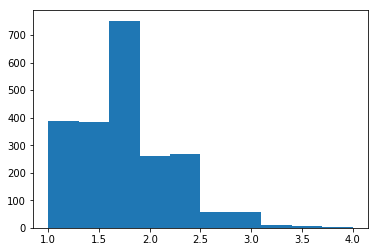

In [7]:
%matplotlib inline
plt.hist(labels_true)
y = np.bincount(labels_true.astype(int))
ii = np.nonzero(y)[0]
zip(ii,y[ii])

An issue is a low number of people in groups 3 and 4

## Possible solution, randomly sample equal numbers
Using the rule of thumb 2^m I need 8 people per cluster 
Possible combinations below

In [8]:
import math
x=math.factorial(70)
y=math.factorial(70-20)
fact=x/y
print(fact)

393849377343759797528386895216640000


## Create target variable (or the one you are comparing)

In [9]:
target_var=pd.DataFrame(dudes['PDS'].values)

## Impute missing values
This will not allow missing data, so have to impute nans

In [10]:
imputer = Imputer()
transformed_values = imputer.fit_transform(X)
# count the number of NaN values in each column
print(np.isnan(transformed_values).sum()) 
transformed_values_scale = scale(transformed_values)
#the target variable is the last variable
trans = np.hstack((transformed_values_scale,target_var.round(decimals=0)))

0


In [11]:
transformed_values.shape

(2189, 11)

## Function to randomly sample the data and perform the kmeans

In [12]:
def bench_k_means(estimator, name, data):
        t0 = time() #time
        estimator.fit(data) #estimating the fit 
        print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
              % (name, (time() - t0), estimator.inertia_,
                 metrics.homogeneity_score(labels, estimator.labels_),
                 metrics.completeness_score(labels, estimator.labels_),
                 metrics.v_measure_score(labels, estimator.labels_),
                 metrics.adjusted_rand_score(labels, estimator.labels_),
                 metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
                 metrics.silhouette_score(data, estimator.labels_,
                                          metric='euclidean',
                                          sample_size=sample_size)))


In [13]:
def meaner(**kwargs):
    for x in kwargs.items():
        print(x)
#     z=sum(*arg)/len(*arg)
#     return z

In [14]:
def PCA_reducer(DATA):
    n_samples, n_features = DATA.shape
    labels = np.round(targets)
    n_digits = len(np.unique(targets))
    sample_size=n_samples
    
    PCA_results = PCA(n_components=2)
    reduced_data = PCA_results.fit_transform(DATA)
    
    # Dump components relations with features:
    print pd.DataFrame(PCA_results.components_,index = ['PC-1','PC-2'])
    plt.semilogy(PCA_results.explained_variance_ratio_, '--o')
    return (PCA_results.components_, PCA_results.explained_variance_ratio_, 
            PCA_results.explained_variance_, PCA_results.mean_) 
    


In [15]:
def random_selct(DATA,i):
    dictr = {}
    #defining the levels, based on the final column add the values to the dictionary
    levels = ['lev1','lev2','lev3']
    i=1
    for lev in levels:
        if i < len(levels)+1:
            dictr[lev] = DATA[np.where(DATA[:,-1] == i)]
            i=i+1
    
    rand_dict={}
    target_dict={}
    ind_dict={}
    for key, value in dictr.iteritems():
        #shuffle the data's index
        ind = np.random.permutation(value.shape[0])#random index
        #get the first 20 subjects indexes
        training_idx = ind[:50]#get 20 subjects indexes
        #get the first 20 subjects
        training = value[training_idx,:]#select 20 subjects from the value in the dictionary
        #saving the true labels
        labels_true = training[:,-1] #get the labels from the value in the dictiornary last column
        target_dict[key] = labels_true #add targets to dictionary
        rand_dict[key] = training #match the randomized data to the ind_dict by key 
        ind_dict[key] = training_idx #add the indexes to the dictionary
    
    '''
    combine all the dictionaries we have created thus far. 
    data, index, and targets
    '''
    
    #combine the randomized data by the actual level
    data=np.vstack((rand_dict['lev1'],rand_dict['lev2'],rand_dict['lev3']))
    
    ###################################################
    data=np.delete(data,11,1)# remove the label column
    ###################################################
    
    
    #combine the true labels into targets
    targets=np.hstack((target_dict['lev1'],target_dict['lev2'],target_dict['lev3']))
    #combine the indexes into one
    indexes=np.hstack((ind_dict['lev1'],ind_dict['lev2'],ind_dict['lev3']))
    
    '''
    defining the parameters for the k means and the PCA
    '''
    
    n_samples, n_features = data.shape
    labels = np.round(targets)
    n_digits = len(np.unique(targets))
    sample_size=n_samples

    '''
    defining the parameters for the k means
    '''    
    kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=300)
    
    
    
    
    ###########################################
    #            rebuild to combine data      #
    ###########################################
    comb_data = np.column_stack((data, kmeans.fit_predict(data)))#makes first column the index value
    full_data = np.column_stack((indexes, comb_data))#makes first column the index value
    full_data = np.column_stack((full_data,labels))
    comb_dictr = {}
    '''
    seperating the data based on the fit predict value (found right above)
    '''
    i=0
    for lev in levels:
        if i < len(levels)+1:
            comb_dictr[lev] = comb_data[np.where(comb_data[:,-1] == i)]
            i=i+1
    '''
    defining the parameters for the PCA and running the PCA 
    '''
    ###########################################
    #            PCA                          #
    ###########################################
    PCA_dict={}
    PCA_data={}
    PCA_final = {}

    for key, value in comb_dictr.iteritems():
        PCA_dict[key] = PCA(n_components=2)
        #make sure the last column which is the predicted label isn't included
        PCA_data[key] = PCA_dict[key].fit_transform(value[:,0:11])
        #make sure the last column which is the predicted label isn't included
        ID = np.identity(value[:,0:11].shape[1])  # identity matrix
        coef = PCA_dict[key].transform(ID)
        PCA_final[key] = coef
        
        
        plt.semilogy(PCA_dict[key].explained_variance_ratio_, '--o', label = '%s'%key)
        plt.legend()
        plt.subplot(1, 2, 2)

    reduced_data = PCA(n_components=2).fit_transform(data)
    kmeans.fit(reduced_data)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    plt.subplot(1, 2, 1)
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
#     plt.show()
    
    ####THINGS TO SAVE#############################################################################        
    kmeans.fit(data)
    y_kmeans = kmeans.predict(data)
    clusters = kmeans.fit_predict(data)
    cluster_space = kmeans.fit_transform(data)
    
    
    
    centroids = kmeans.cluster_centers_   
    
    Components = np.vstack((PCA_dict['lev1'].components_,
                            PCA_dict['lev2'].components_,PCA_dict['lev3'].components_))
    
    Var_ratio = PCA_final
    
    lev1_VarRatio = np.vstack((PCA_final['lev1']))
    lev2_VarRatio = np.vstack((PCA_final['lev2']))
    lev3_VarRatio = np.vstack((PCA_final['lev3']))
    
    ind_dict = np.hstack((ind_dict['lev1'],
                            ind_dict['lev2'],ind_dict['lev3']))
    
    ########################################################################################################
    return (clusters, cluster_space, centroids, 
            targets, ind_dict,
           Components, Var_ratio, 
           full_data,
           lev1_VarRatio,
           lev2_VarRatio,
           lev3_VarRatio,
           kmeans)

# 0clusters
# 1cluster_space, 
# 2centroids, 
# 3targets, 
# 4ind_dict,
# 5Components,
# 6Var_ratio, 
# 7full_data,
# 8lev1_VarRatio,
# 9lev2_VarRatio,
# 10lev3_VarRatio

In [16]:
def main(i):
    names = ['pds_ht2_y',
'pds_skin2_y',
'pds_bdyhair_y',
'pds_m4_y',
'pds_m5_y',
'interview_age',
'anthroheightcalc', 
'anthroweightcalc',
'anthro_waist_cm',
'hormone_scr_dhea_mean',
'hormone_scr_hse_mean',
'labels_pred',
'labels_true']
    
    Clusters = []
    Cluster_space = []
    Centroids = []
    
    Comp = []
    Var_ratio = []
    
    Targets = []
    Indexes = []
    
    Full_data = []
    
    Lev1_VarRatio = []
    Lev2_VarRatio = []
    Lev3_VarRatio = []
    
    kmeans = []
    for x in range(0,i):
        print(x)
        Q = random_selct(trans,i)
        Clusters.append(Q[0])
        Cluster_space.append(Q[1])
        Centroids.append(Q[2])
        
        Targets.append(Q[3])
        Indexes.append(Q[4])
        
        Comp.append(Q[5])
        Var_ratio.append(Q[6])
        
        Full_data.append(Q[7])
        
        Lev1_VarRatio.append(Q[8].transpose())
        Lev2_VarRatio.append(Q[9].transpose())
        Lev3_VarRatio.append(Q[10].transpose())
        
        kmeans.append(Q[11])
    All_lev1Ratio = np.vstack(Lev1_VarRatio)
    All_lev2Ratio = np.vstack(Lev2_VarRatio)
    All_lev3Ratio = np.vstack(Lev3_VarRatio)
    
    All_clust = np.hstack(Clusters)
    All_clust_space = np.vstack(Cluster_space)
    
    All_labels = np.hstack(Targets)
    All_index = np.hstack(Indexes)
    
    All_comp = np.vstack(Comp)
    All_var_ratio = Var_ratio
    All_data = np.vstack(Full_data)
    
    print(All_data.shape)
    All_data=pd.DataFrame(data=All_data[1:,1:],index=All_data[1:,0], columns= names)
    return (All_clust ,All_clust_space,  
            All_labels , All_index, All_comp, All_var_ratio, 
            All_data, names, 
           All_lev1Ratio, All_lev2Ratio, All_lev3Ratio, kmeans)

In [ ]:
All_clust ,All_clust_space,All_labels , All_index, All_comp, All_var_ratio,All_data, names, All_lev1Ratio, All_lev2Ratio, All_lev3Ratio, kmeans = main(5000)

In [40]:
All_labels

array([ 1.,  1.,  1., ...,  3.,  3.,  3.])

## Taking the variance from each K mean cluster and PCA, using PCA to find the most important factors over all

Lev3
      pds_ht2_y  pds_skin2_y  pds_bdyhair_y  pds_m4_y  pds_m5_y  \
PC-1   0.310552     0.250302       0.255325  0.323349  0.313494   
PC-2   0.275942     0.428556       0.441341  0.077528 -0.016185   

      interview_age  anthroheightcalc  anthroweightcalc  anthro_waist_cm  \
PC-1       0.323322          0.305352          0.271825         0.291051   
PC-2      -0.249484         -0.357098         -0.403635        -0.306800   

      hormone_scr_dhea_mean  hormone_scr_hse_mean  
PC-1               0.321770              0.336110  
PC-2               0.290183             -0.090144  




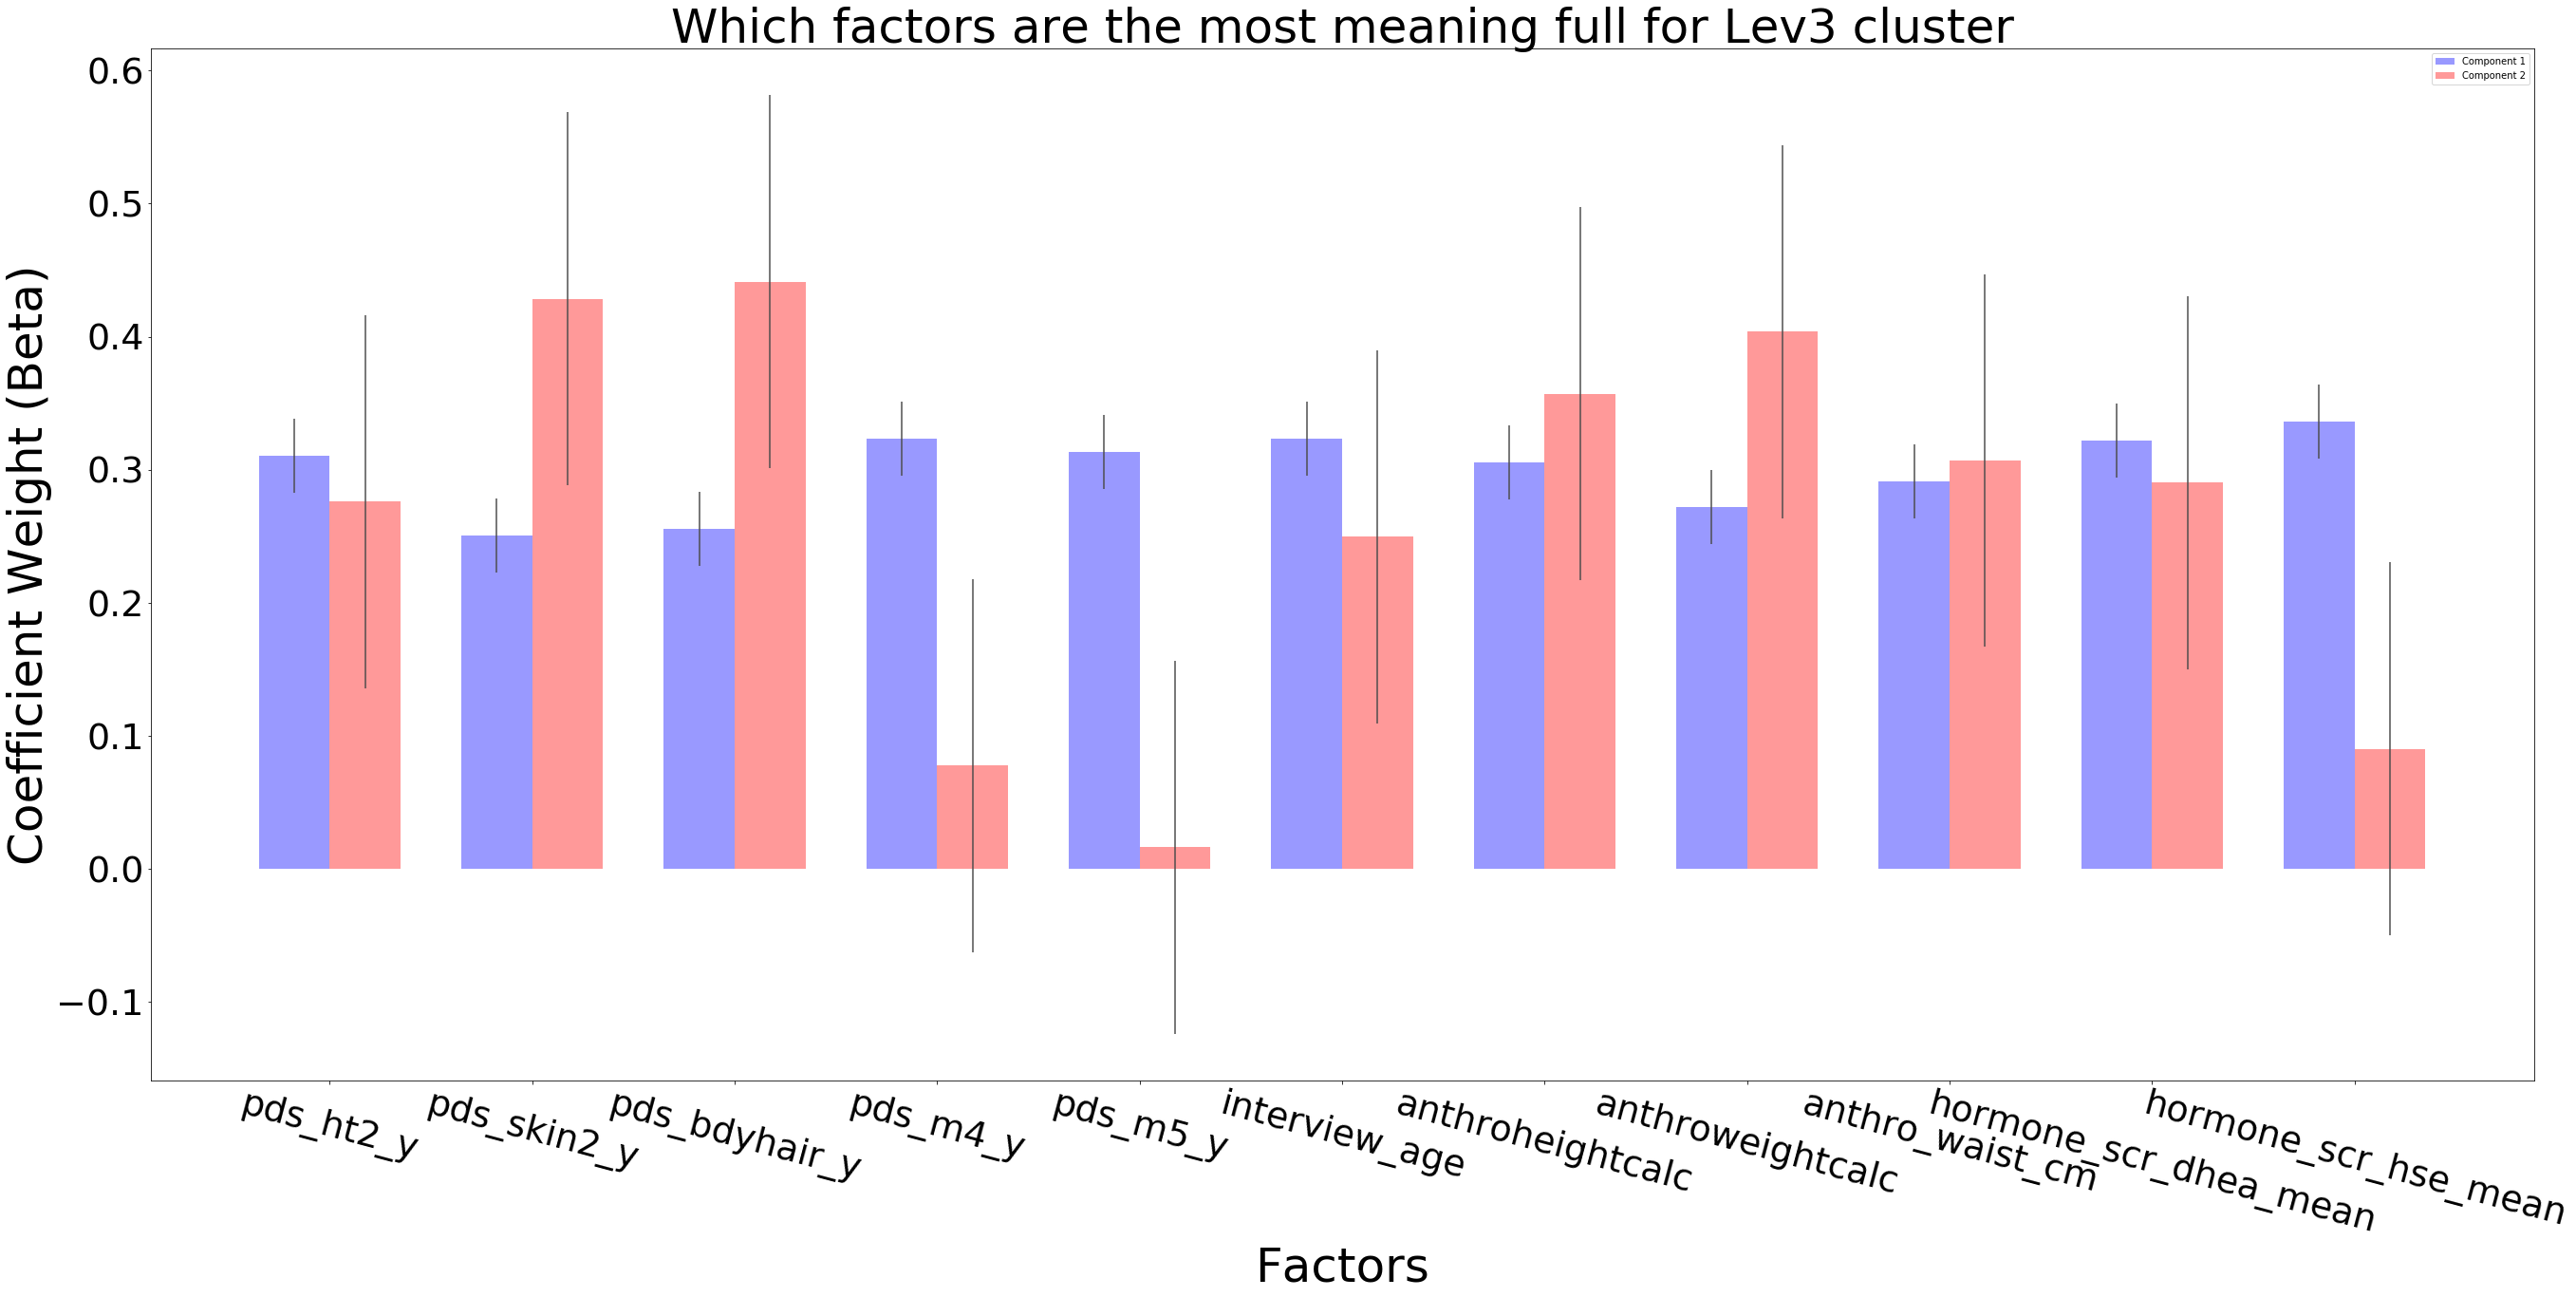

Lev2
      pds_ht2_y  pds_skin2_y  pds_bdyhair_y  pds_m4_y  pds_m5_y  \
PC-1   0.305872     0.251926       0.253263  0.324622  0.318536   
PC-2   0.294256     0.380894       0.424526  0.088840  0.025671   

      interview_age  anthroheightcalc  anthroweightcalc  anthro_waist_cm  \
PC-1       0.328045          0.309107          0.269801         0.288065   
PC-2      -0.289436         -0.377231         -0.403566        -0.305806   

      hormone_scr_dhea_mean  hormone_scr_hse_mean  
PC-1               0.315698              0.336732  
PC-2               0.306590             -0.055704  




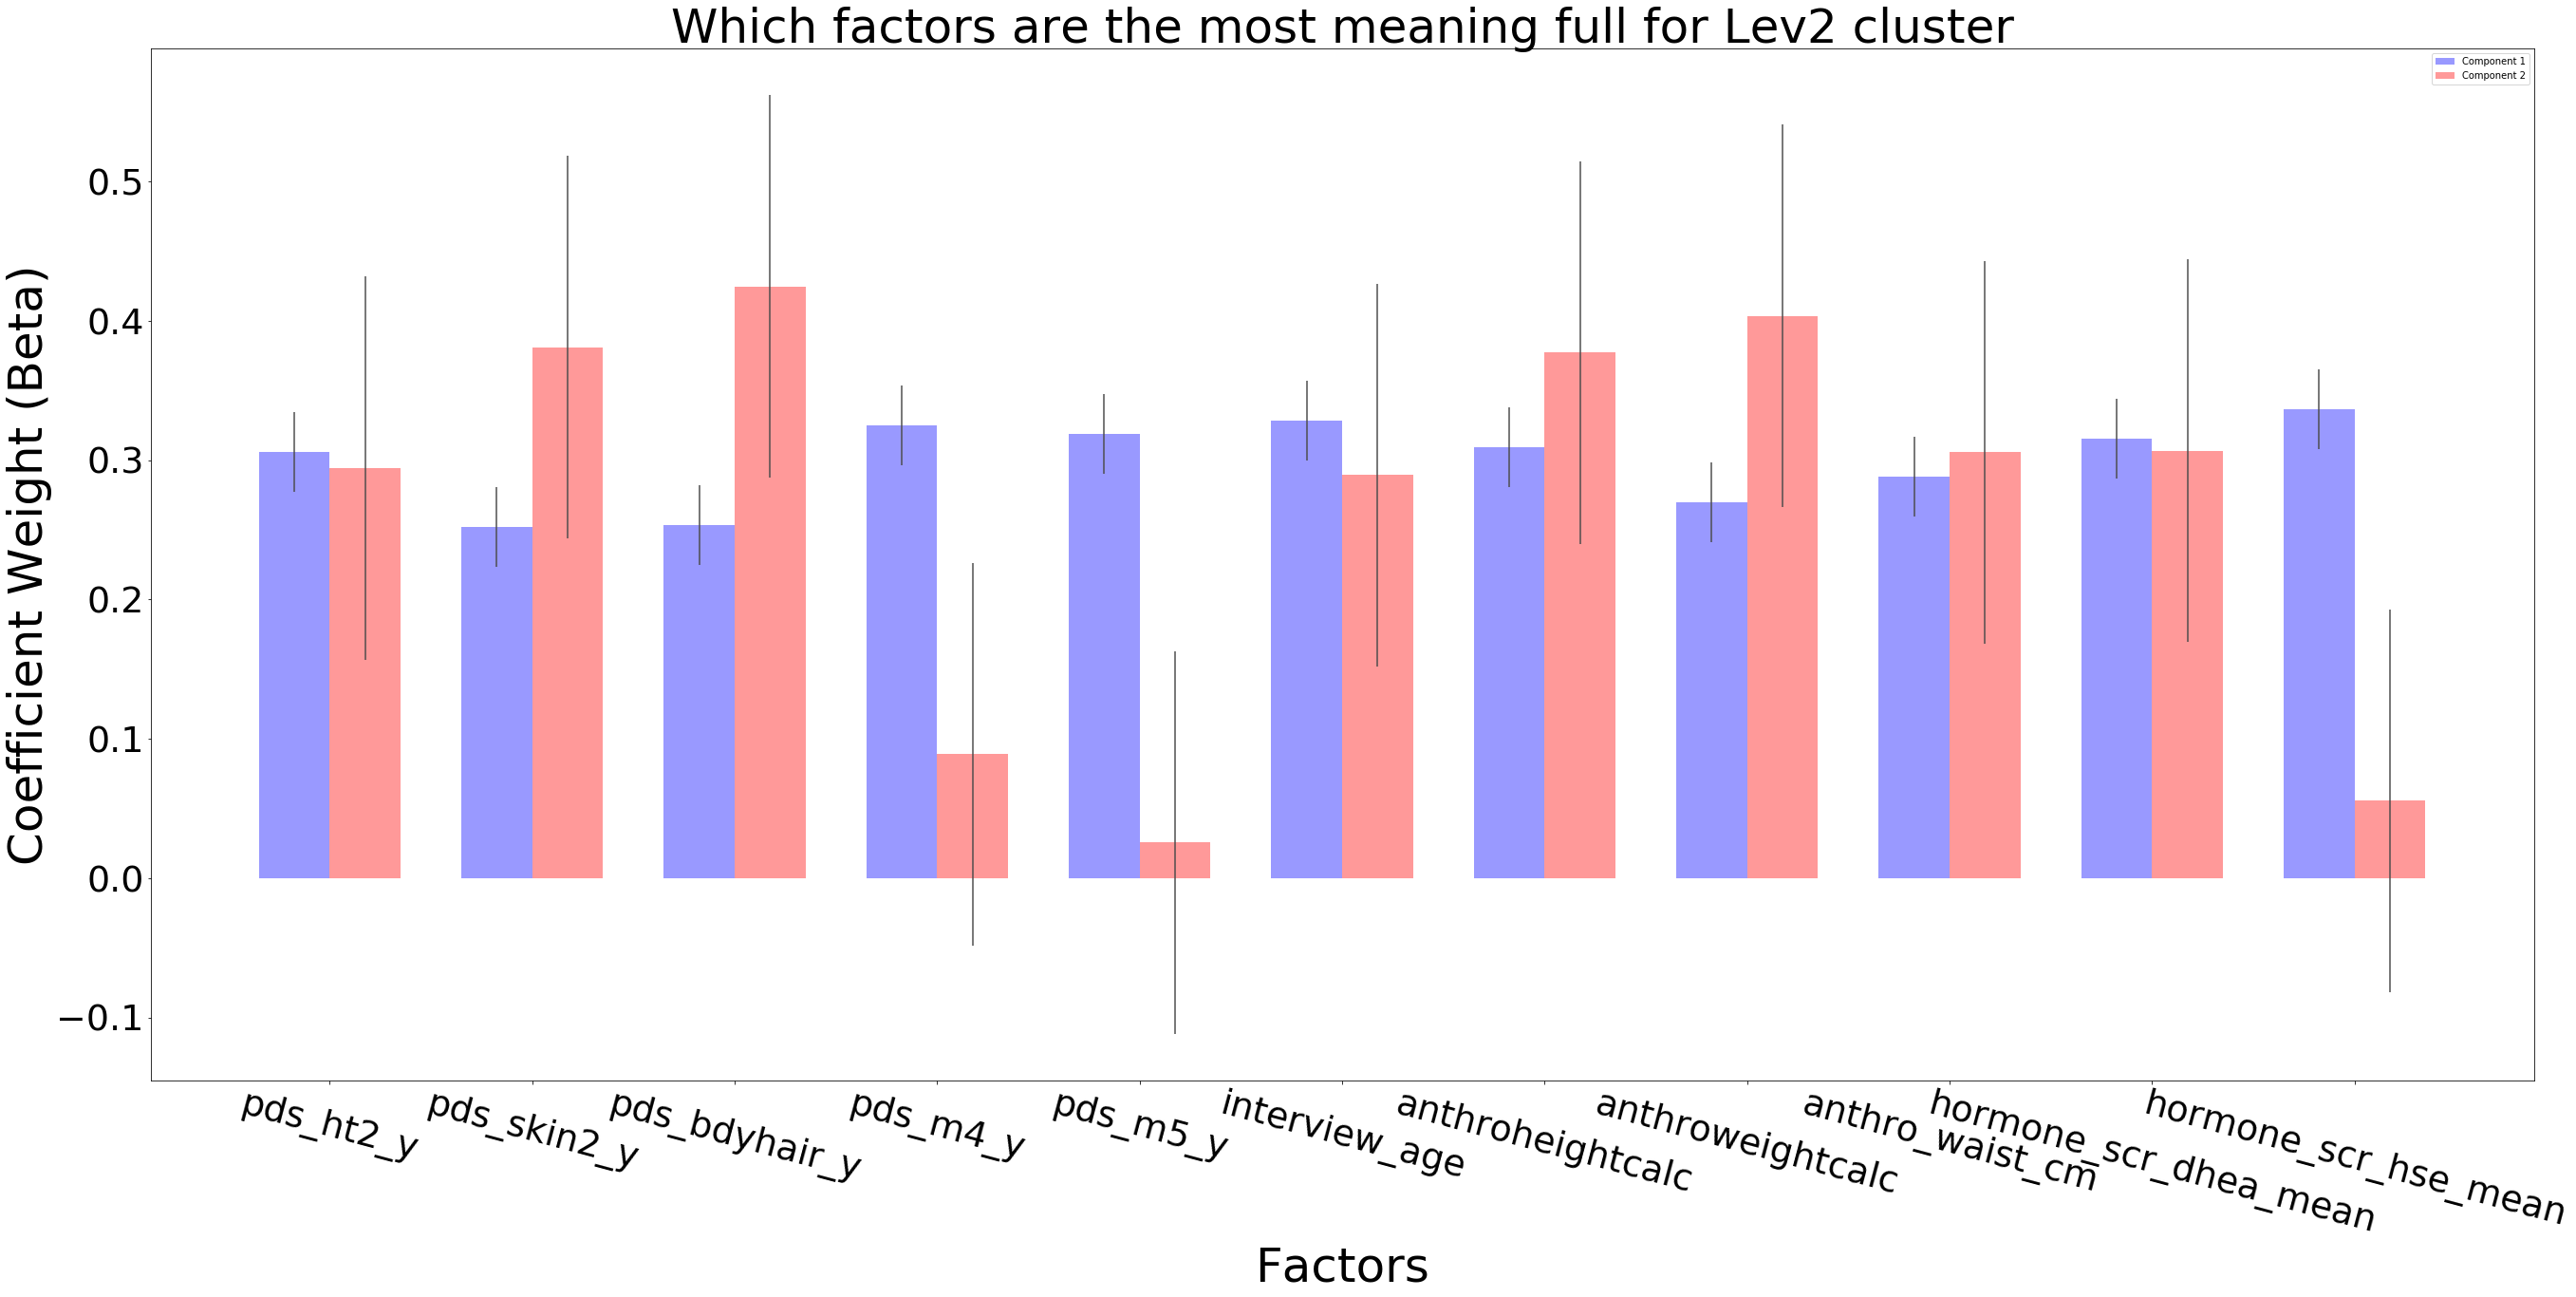

Lev1
      pds_ht2_y  pds_skin2_y  pds_bdyhair_y  pds_m4_y  pds_m5_y  \
PC-1  -0.309471    -0.248530      -0.253362 -0.324888 -0.316061   
PC-2   0.309010     0.384682       0.431739  0.090136  0.002965   

      interview_age  anthroheightcalc  anthroweightcalc  anthro_waist_cm  \
PC-1      -0.325871         -0.308389         -0.272757        -0.289327   
PC-2      -0.289158         -0.373910         -0.394670        -0.293249   

      hormone_scr_dhea_mean  hormone_scr_hse_mean  
PC-1              -0.316601             -0.336426  
PC-2               0.302465             -0.073037  




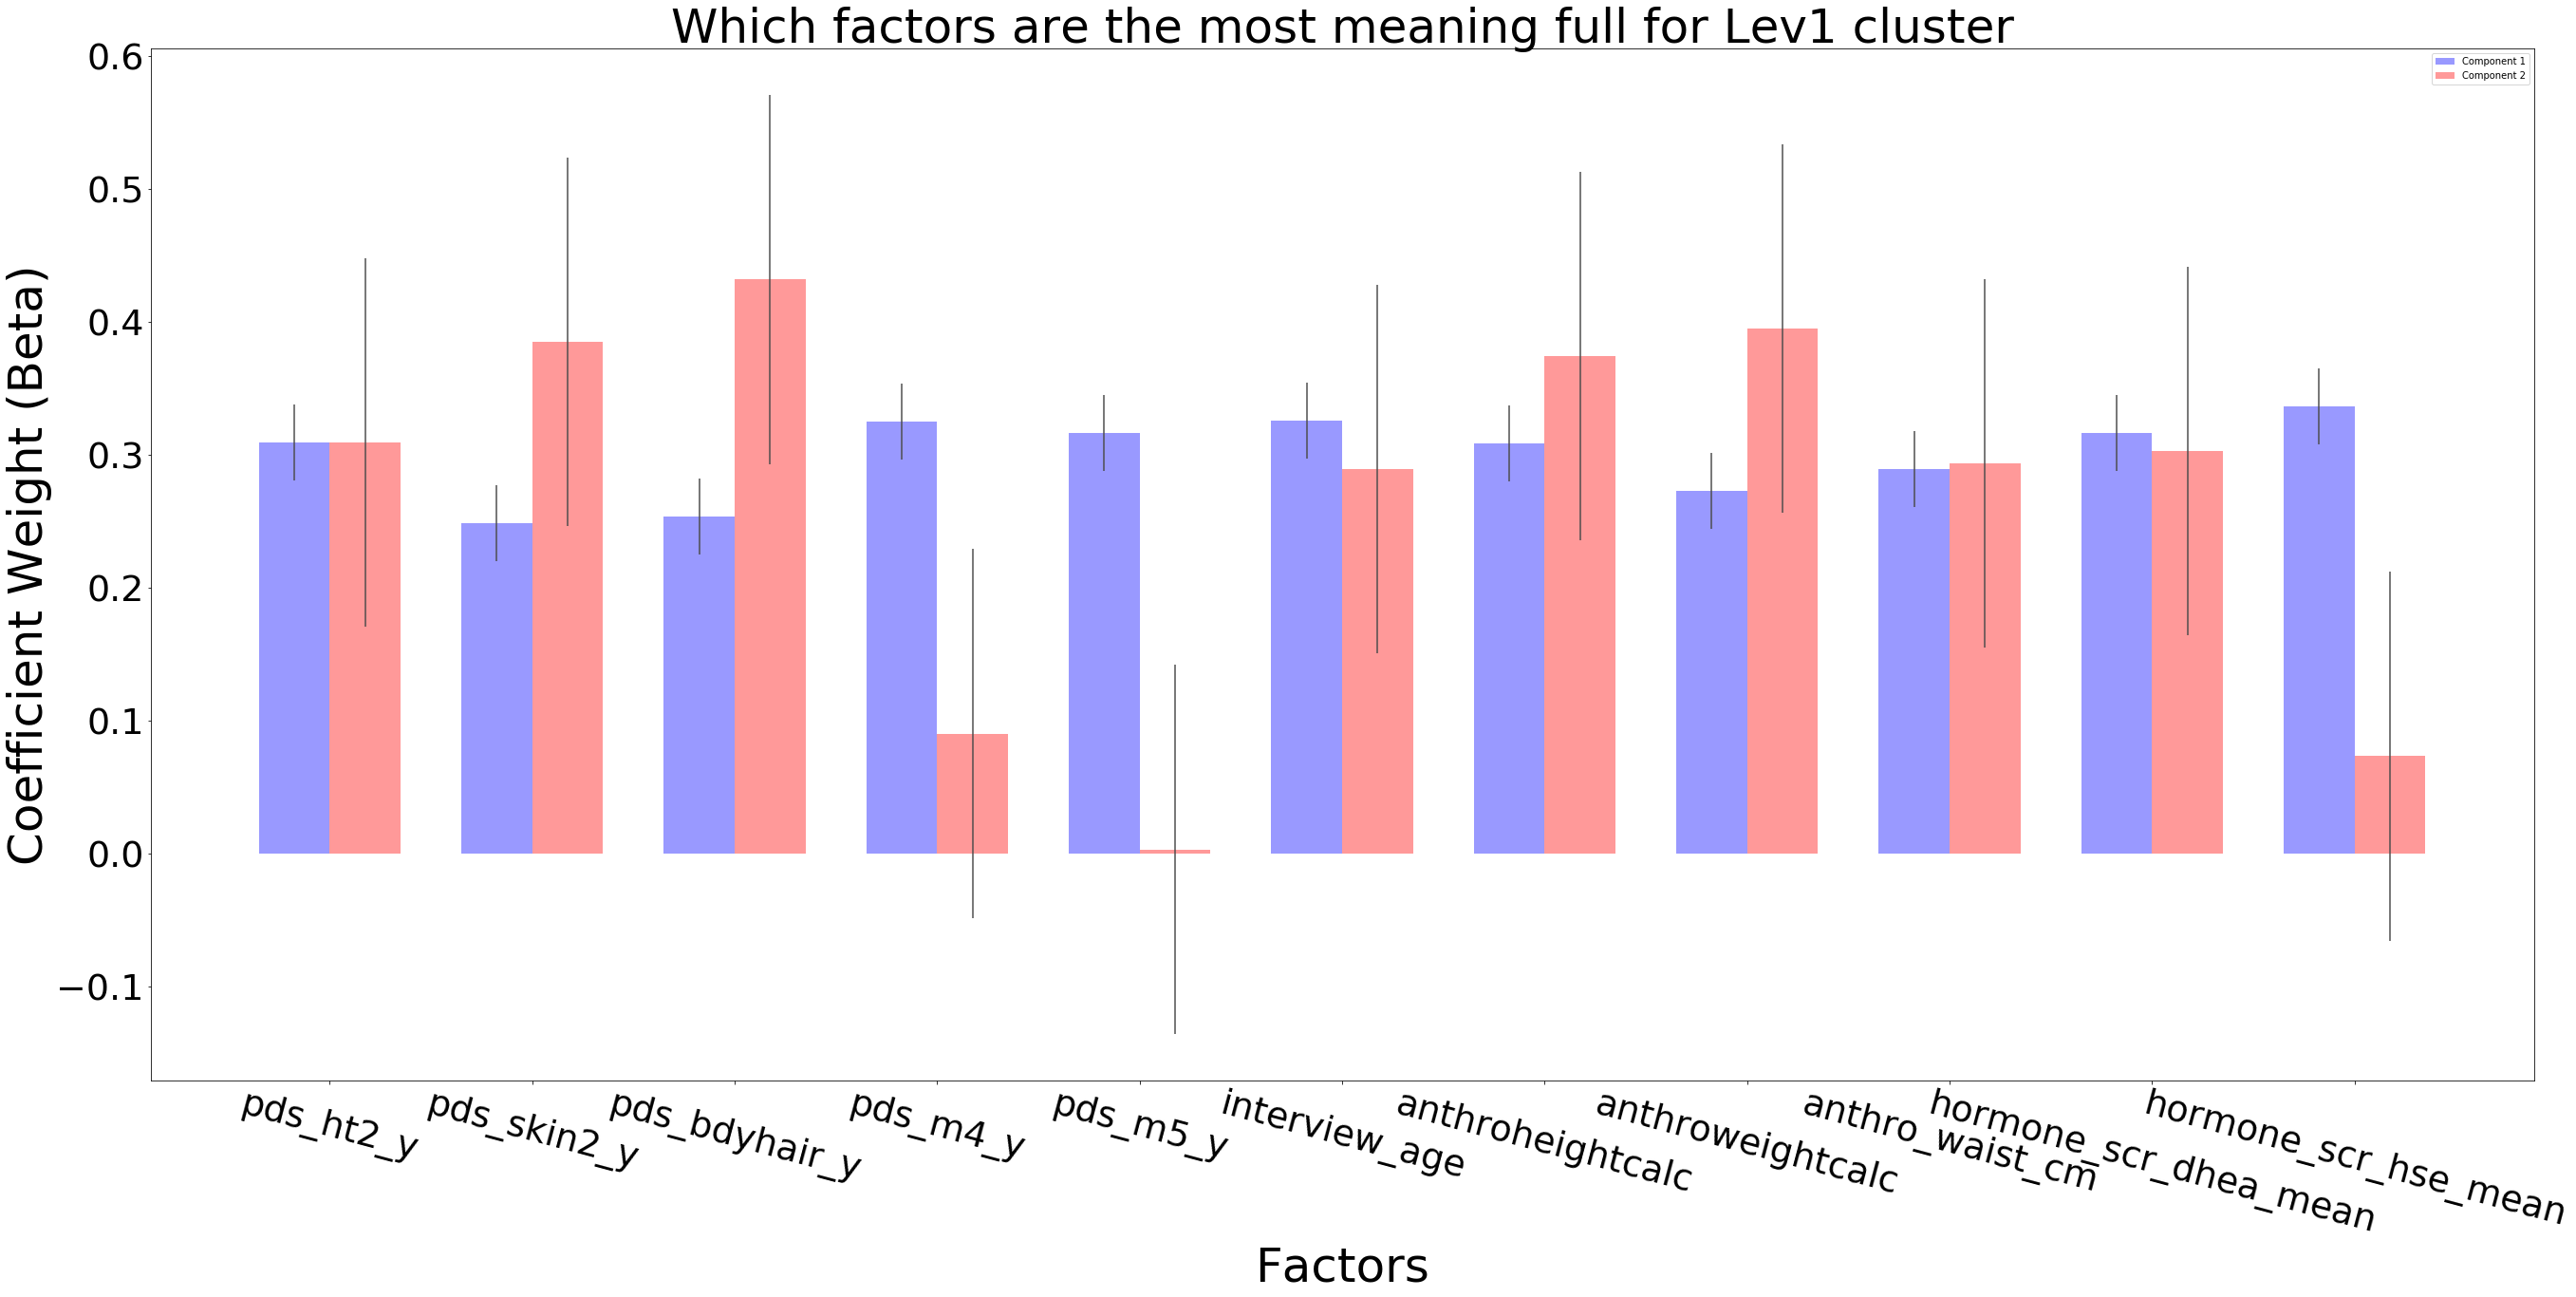

In [19]:
All_Ratios = {'Lev1': All_lev1Ratio, 'Lev2': All_lev2Ratio, 'Lev3':All_lev3Ratio}
Coefs = {}
index = np.arange(11)
for key, value in All_Ratios.iteritems(): 
    pca = PCA(n_components=2)
    pca.fit_transform(value)
    i = np.identity(value.shape[1])  # identity matrix
    Coefs[key] = pca.transform(i)
    print(key)
    print pd.DataFrame(pca.components_,columns=names[0:11],index = ['PC-1','PC-2'])
    print('\n')
    
    n_groups = 11

    means_CP1 = np.absolute(pca.components_[0,:])
    std_CP1 = np.matrix.std(np.matrix(np.absolute(pca.components_[0,:])))

    means_CP2 = np.absolute(pca.components_[1,:])
    std_CP2 = np.matrix.std(np.matrix(np.absolute(pca.components_[1,:])))

    fig, ax = plt.subplots(figsize=(45, 20))
    bar_width = 0.35

    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    rects1 = ax.bar(index, means_CP1, bar_width,
                    alpha=opacity, color='b',
                    yerr=std_CP1, error_kw=error_config,
                    label='Component 1')

    rects2 = ax.bar(index + bar_width, means_CP2, bar_width,
                    alpha=opacity, color='r',
                    yerr=std_CP2, error_kw=error_config,
                    label='Component 2')
    #plt.xlabel( fontsize=18)
    ax.set_xlabel('Factors', fontsize = 50)
    ax.set_ylabel('Coefficient Weight (Beta)', fontsize = 50)
    ax.set_title('Which factors are the most meaning full for %s cluster'%key, fontsize = 50)
    ax.set_xticks(index + bar_width / 2)
    
    ax.set_xticklabels(names[0:11], fontsize = 28, rotation = -15)
    ax.legend()
    ax.tick_params(labelsize = 38)

    fig=plt.figure(figsize=(100, 16), dpi= 80, facecolor='w', edgecolor='k')
    fig.tight_layout()
    plt.show()
    

In [20]:
All_data.shape

(749999, 13)

## Looking at the data

merging the original and new data sets on the indexes

In [21]:
names2=['pds_ht2_yR',
'pds_skin2_yR',
'pds_bdyhair_yR',
'pds_m4_yR',
'pds_m5_yR',
'interview_ageR',
'anthroheightcalcR', 
'anthroweightcalcR',
'anthro_waist_cmR',
'hormone_scr_dhea_meanR',
'hormone_scr_hse_meanR']

In [22]:
testData = pd.DataFrame(data = transformed_values, columns= names2)
#print(testData)
total = pd.merge(testData, All_data, left_index = True, right_index = True,how = 'left')
total['INDY'] = total.index
total_g = total.groupby(['INDY'],axis = 0).mean()
total_g['labels_predR'] = total_g['labels_pred'].round()
total_g.head(10)

,pds_ht2_yR,pds_skin2_yR,pds_bdyhair_yR,pds_m4_yR,pds_m5_yR,interview_ageR,anthroheightcalcR,anthroweightcalcR,anthro_waist_cmR,hormone_scr_dhea_meanR,...,pds_m5_y,interview_age,anthroheightcalc,anthroweightcalc,anthro_waist_cm,hormone_scr_dhea_mean,hormone_scr_hse_mean,labels_pred,labels_true,labels_predR
INDY,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,0.0,0.0,130.0,54.500000,68.500000,22.25,1089.0,...,-0.995105,0.619048,0.795481,1.879177,1.219945,-0.622013,-2.616485e-01,1.000000,2.644578,1.0
1,3.0,3.0,1.0,0.0,0.0,109.0,57.500000,72.000000,23.50,667.0,...,-0.995105,0.849040,0.602040,0.077031,0.144381,-0.408637,-1.191015e+00,1.030485,2.638187,1.0
2,3.0,1.0,2.0,0.0,0.0,119.0,58.950000,96.600000,30.00,1528.0,...,-0.995105,1.093245,1.522277,2.585014,2.024849,-0.548025,-1.597849e-01,1.022811,2.658656,1.0
3,2.0,1.0,1.0,0.0,0.0,119.0,54.833333,65.266667,21.80,214.0,...,-0.995105,0.963995,0.807698,-0.005001,-0.056000,-0.344534,-1.099993e+00,1.013743,2.670170,1.0
4,3.0,2.0,2.0,0.0,0.0,109.0,59.200000,94.800000,26.40,1.0,...,-0.995105,-0.516932,1.084476,1.763071,0.469306,-0.497713,-2.446399e-01,0.999594,2.671812,1.0
5,1.0,1.0,1.0,0.0,0.0,119.0,53.140000,69.000000,23.75,2127.0,...,-0.995105,1.268558,0.444763,0.472916,0.459267,-0.870642,-9.593643e-15,1.027767,2.678068,1.0
6,2.0,1.0,1.0,0.0,0.0,108.0,50.000000,65.083333,26.00,1018.0,...,-0.995105,0.026392,0.900610,-0.204849,-1.145722,-0.494160,-1.107659e+00,1.002013,2.652576,1.0
7,2.0,1.0,1.0,0.0,0.0,132.0,58.000000,84.000000,28.00,1067.0,...,-0.995105,-0.890896,0.210808,1.155742,1.398789,-0.590405,-2.551692e-01,1.007290,2.652896,1.0
8,4.0,1.0,4.0,0.0,0.0,126.0,59.000000,141.950000,35.00,23.0,...,-0.995105,0.458657,1.763406,1.327439,0.176193,-0.408355,-2.534419e-01,1.037790,2.643234,1.0


In [23]:
x=total_g.groupby(['labels_predR'], axis =0).describe()
x['anthroweightcalcR']#weight lbs

,count,mean,std,min,25%,50%,75%,max
labels_predR,,,,,,,,
1.0,1280.0,83.675874,23.713292,44.0,67.35,77.0,93.8125,216.466667


In [24]:
T=total_g.groupby(['labels_predR'], axis =0).describe()
T['hormone_scr_hse_meanR'] #testosterone

,count,mean,std,min,25%,50%,75%,max
labels_predR,,,,,,,,
1.0,1280.0,13.46747,12.253362,0.0,1.38175,18.282973,18.282973,75.78


In [25]:
WC=total_g.groupby(['labels_predR'], axis =0).describe()
WC['anthro_waist_cmR']# waist circ

,count,mean,std,min,25%,50%,75%,max
labels_predR,,,,,,,,
1.0,1280.0,26.621128,4.639397,18.0,23.5,25.75,28.5,75.0


In [26]:
Skin=total_g.groupby(['labels_predR'], axis =0).describe()
Skin['pds_skin2_yR']# skin

,count,mean,std,min,25%,50%,75%,max
labels_predR,,,,,,,,
1.0,1280.0,1.694531,0.781711,1.0,1.0,2.0,2.0,4.0


In [27]:
total_g['pds_skin2_yR'].std()

0.7712940094266635

## A Nice Plot example

In [ ]:
# # print(All_data)
# # df2 = pd.DataFrame(group.describe().rename(columns={'interview_age':labels_pred}).squeeze()
# #                          for name, group in All_data.groupby('labels_pred'))

# # print(df2)
# subs=list(All_data.index.values)
# len(subs)
# All_data.interview_age.describe()

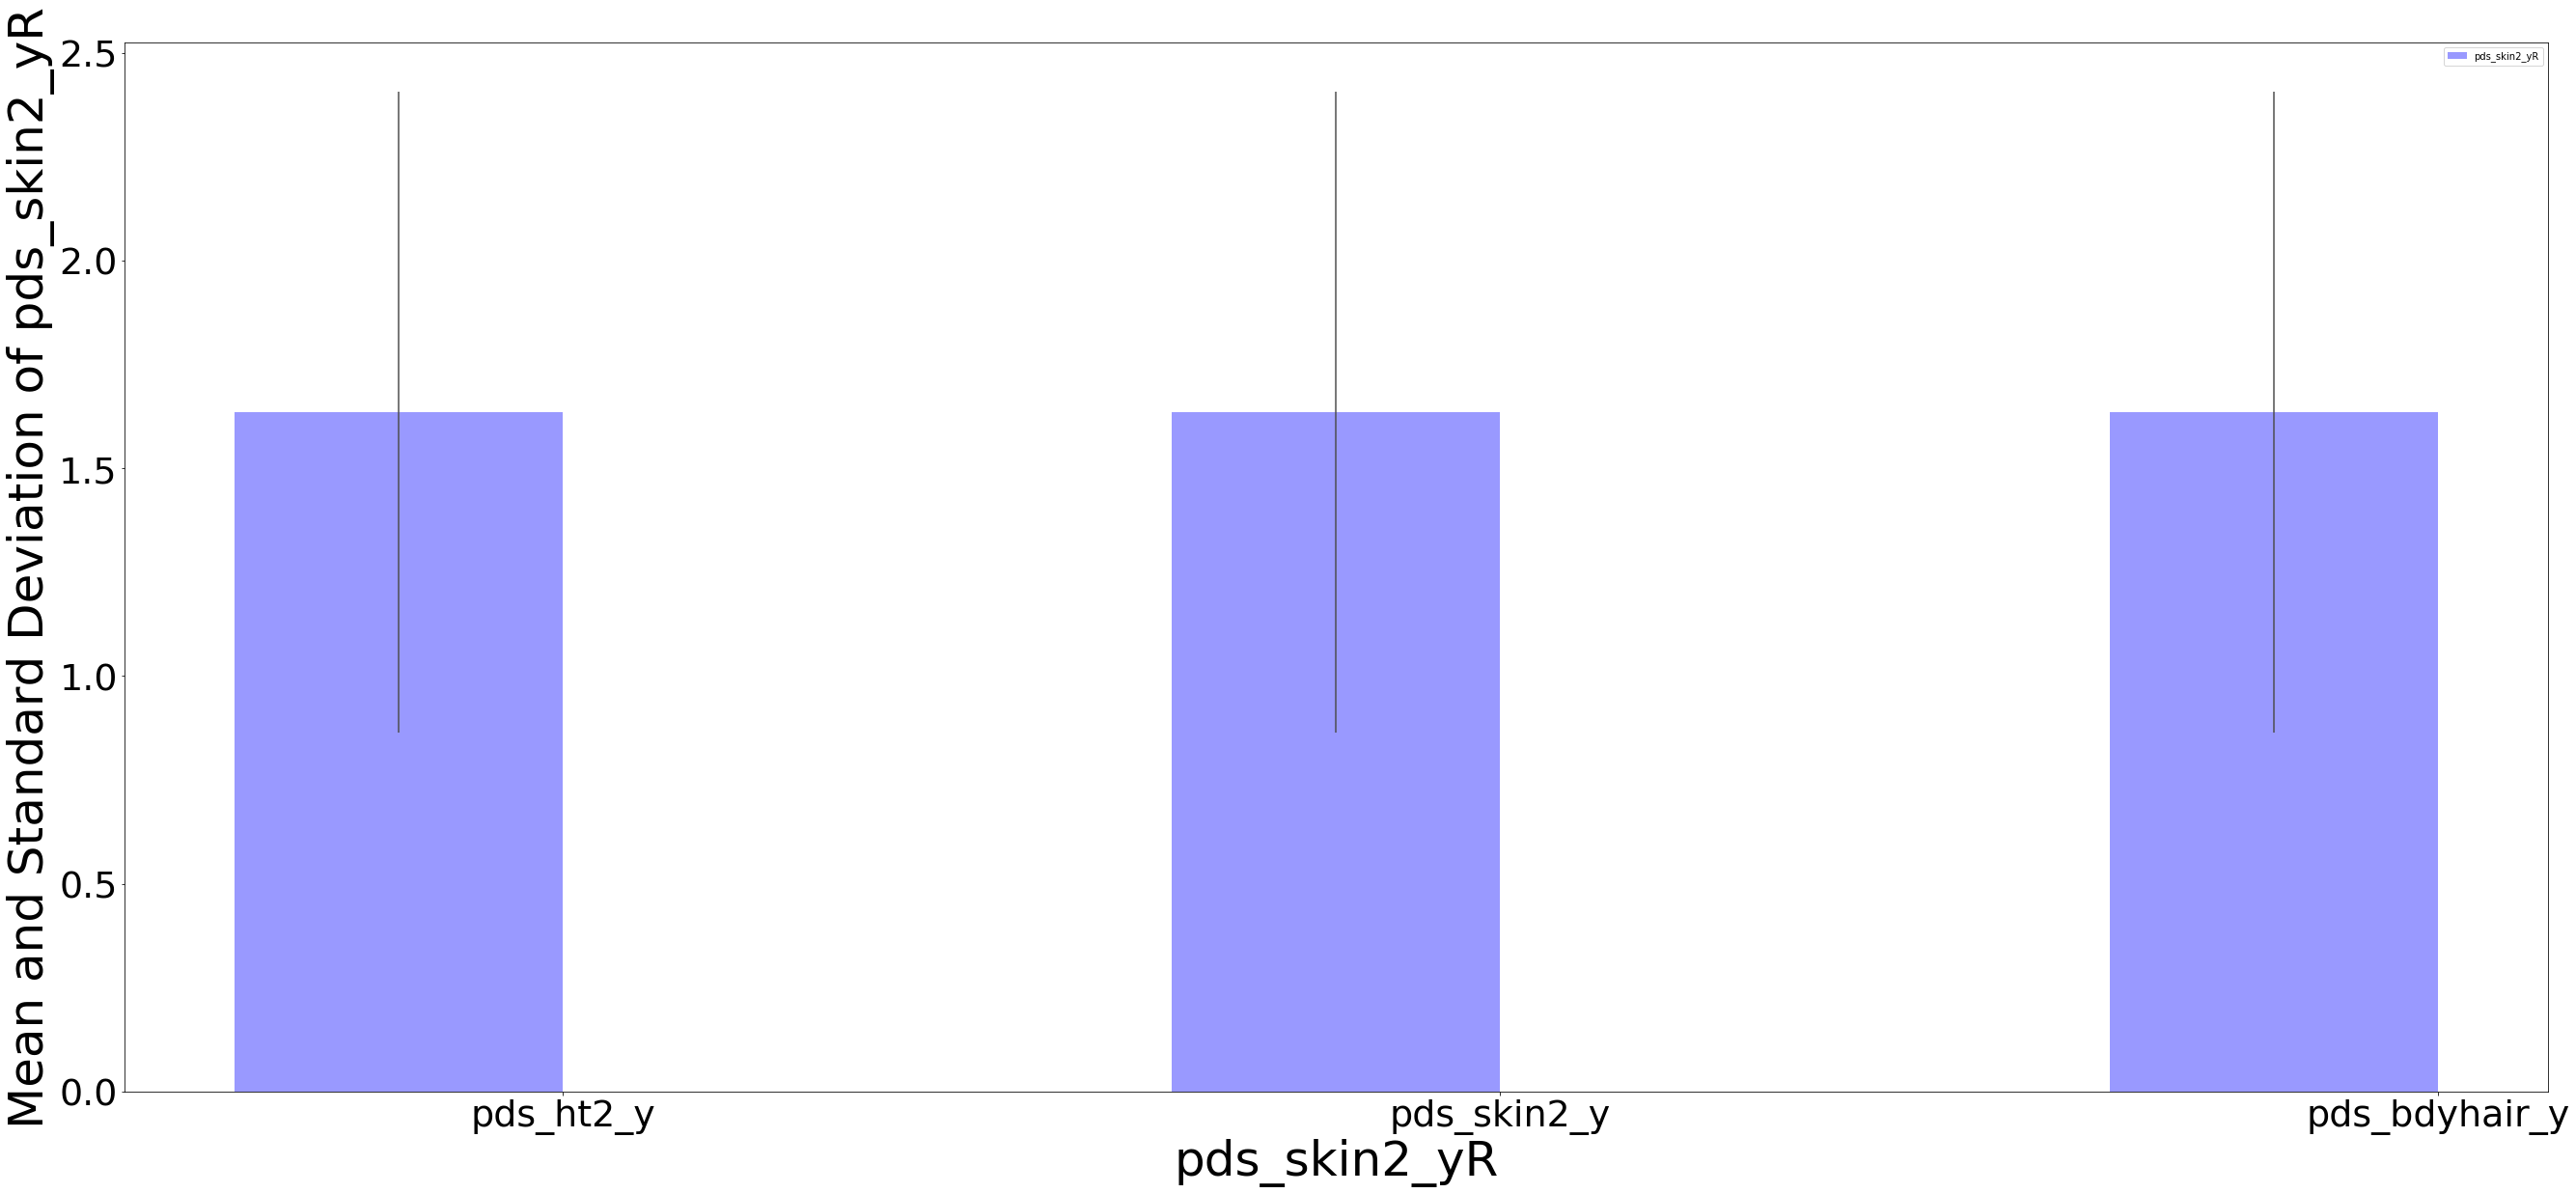

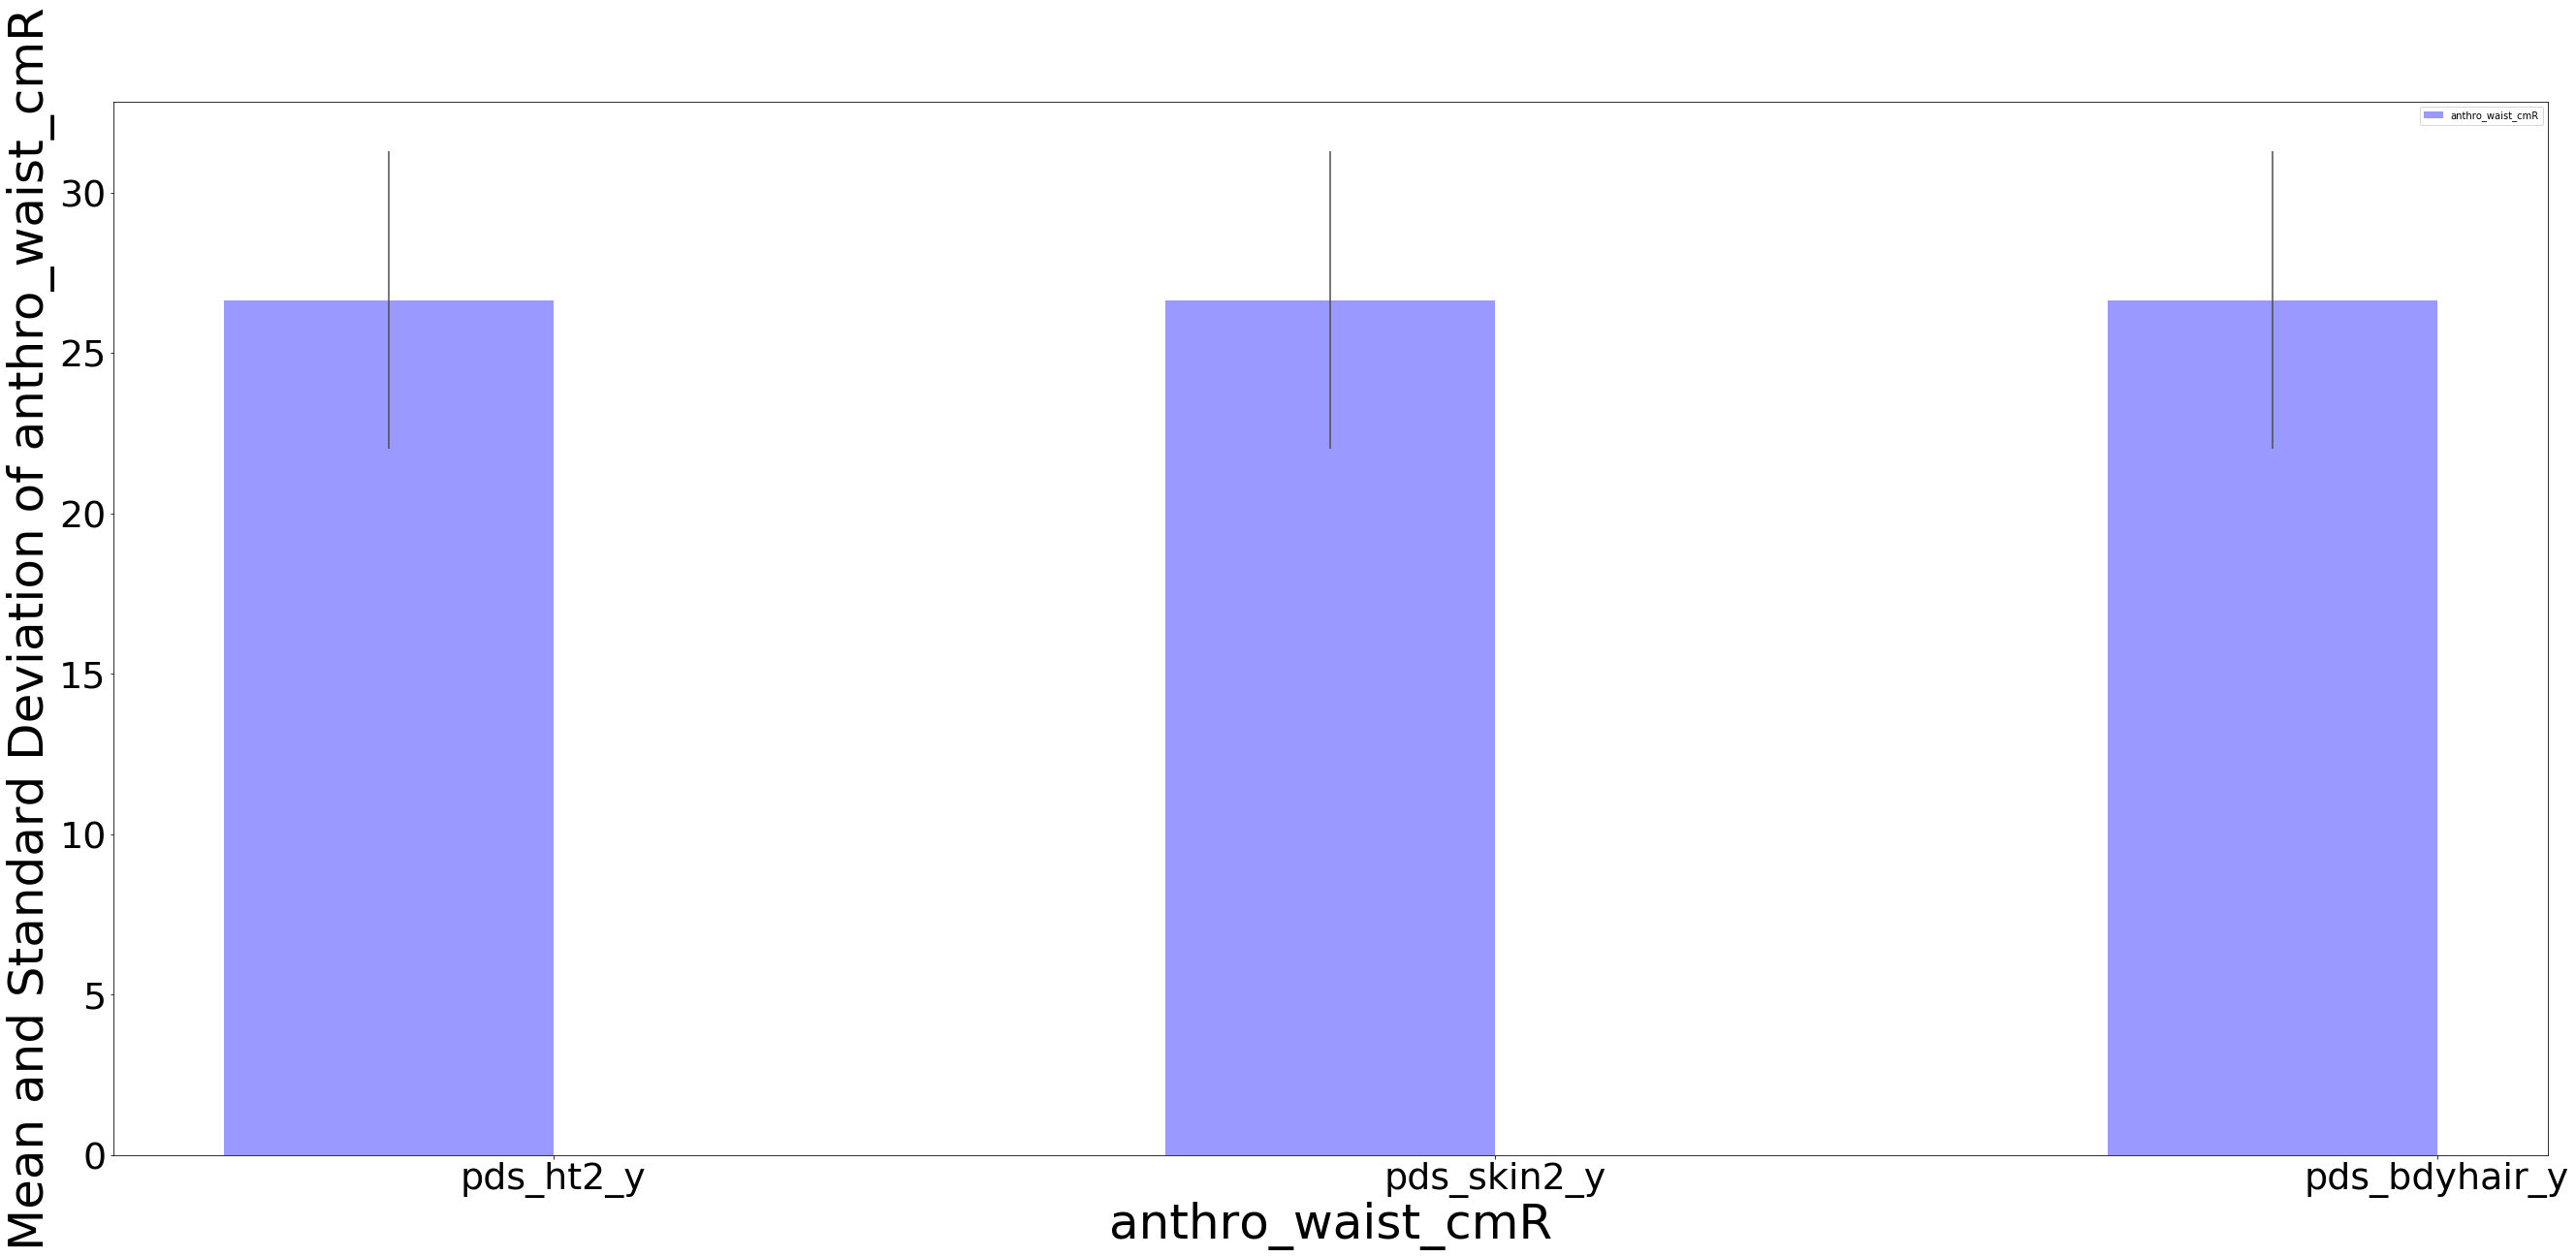

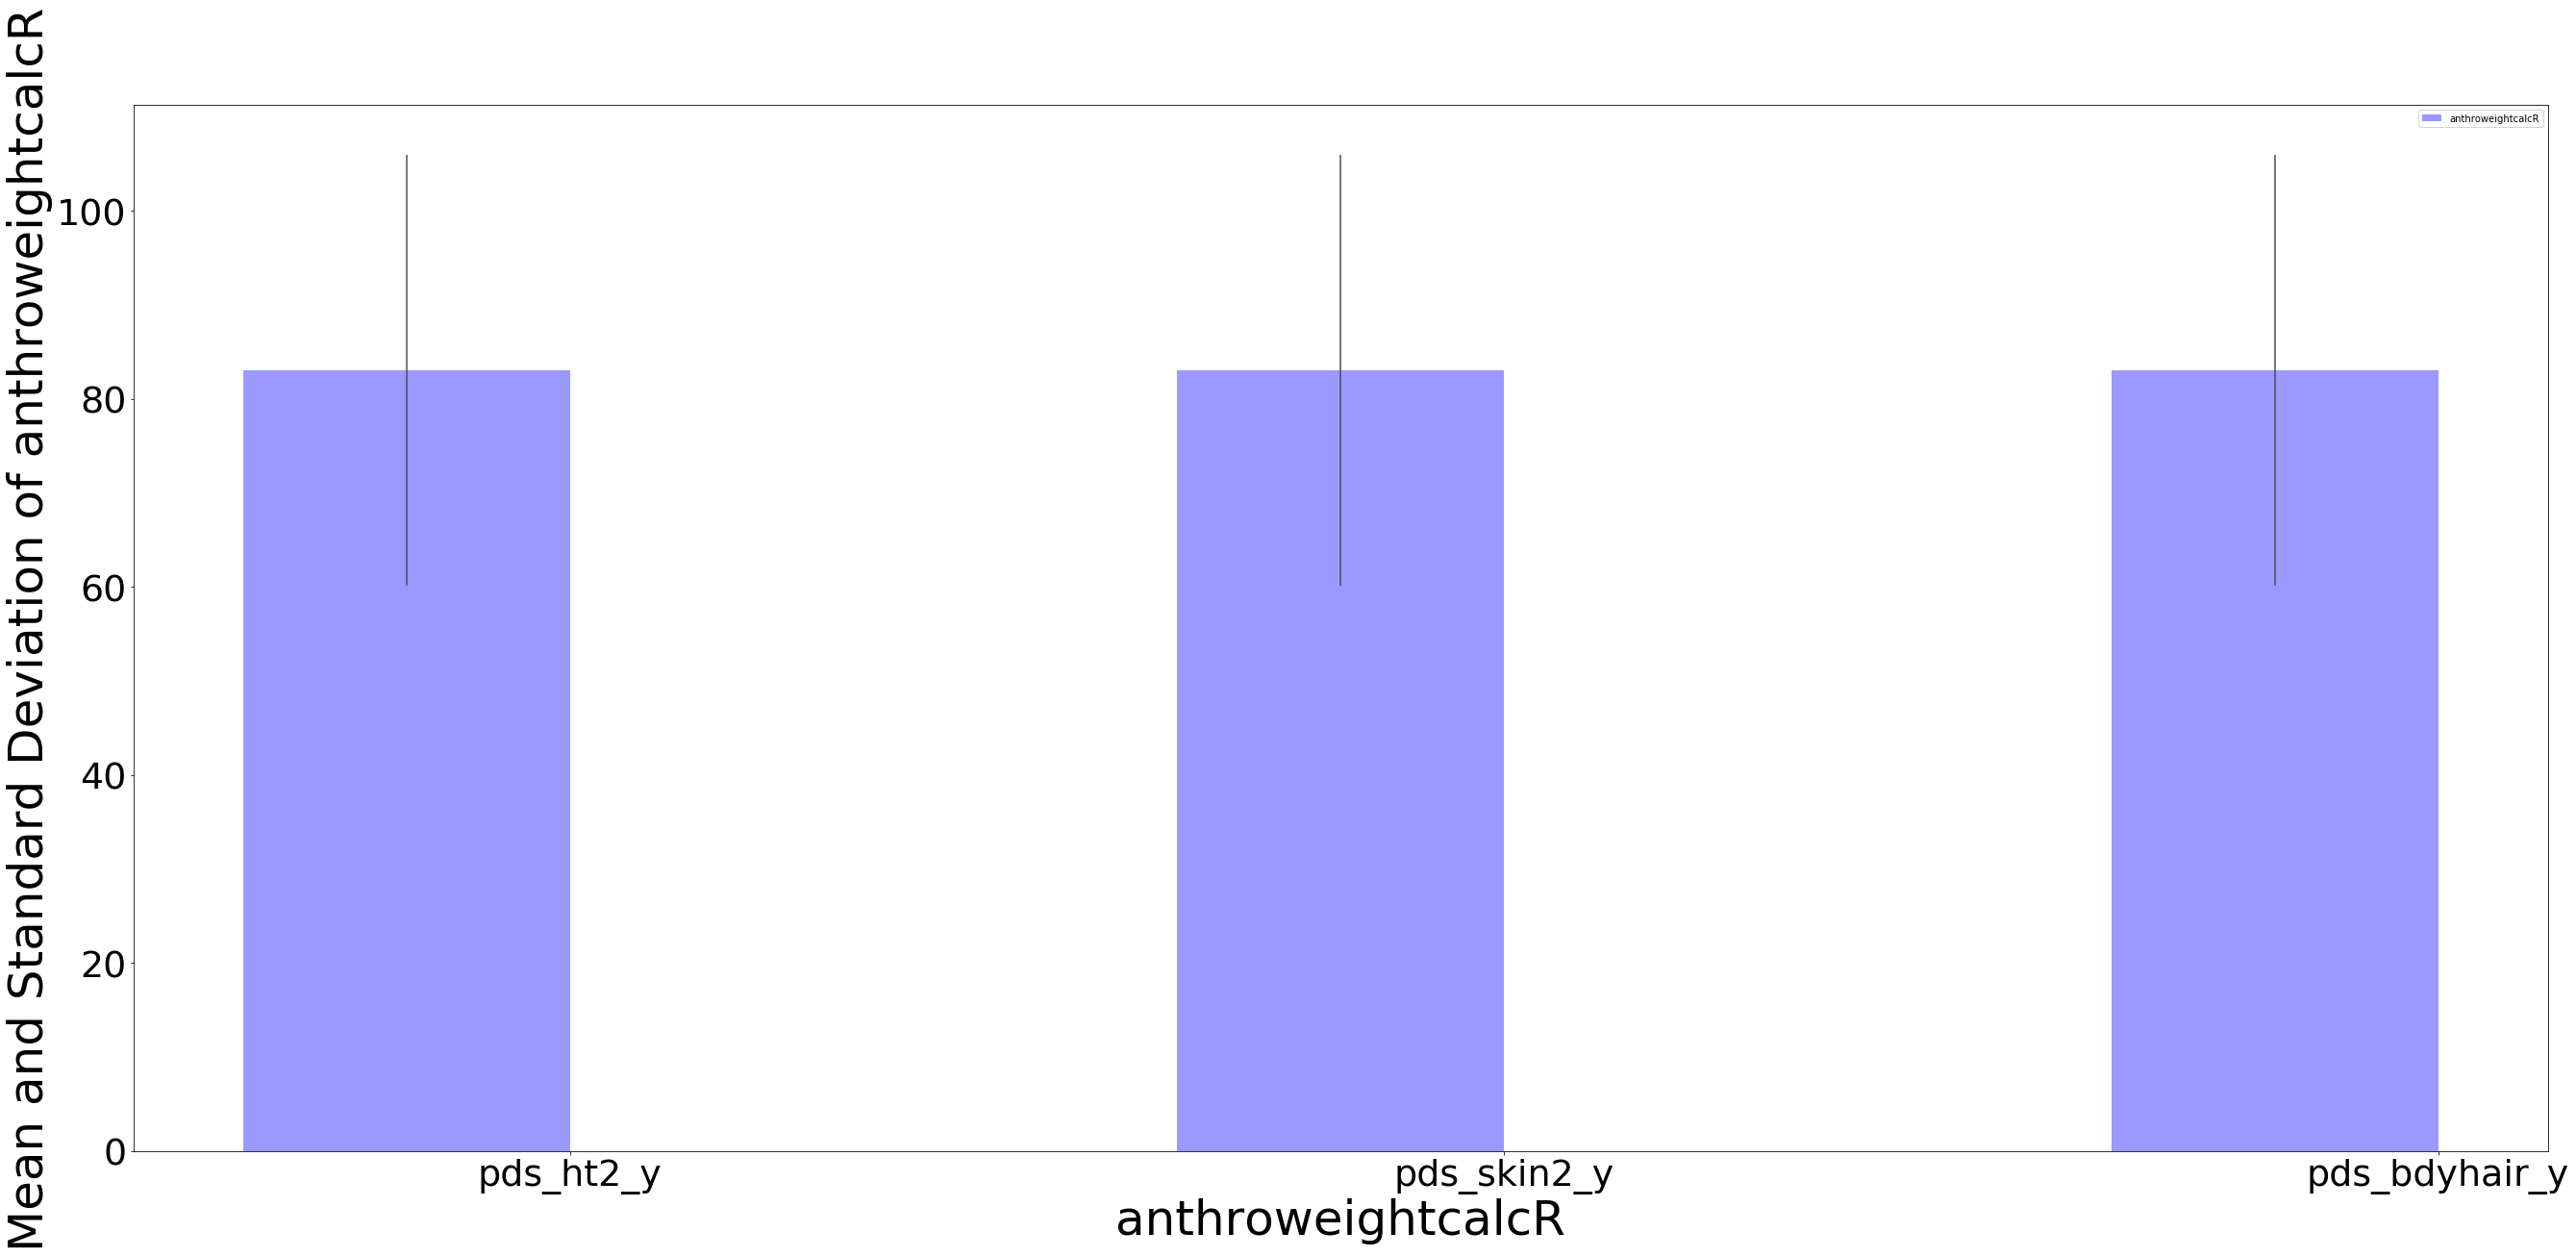

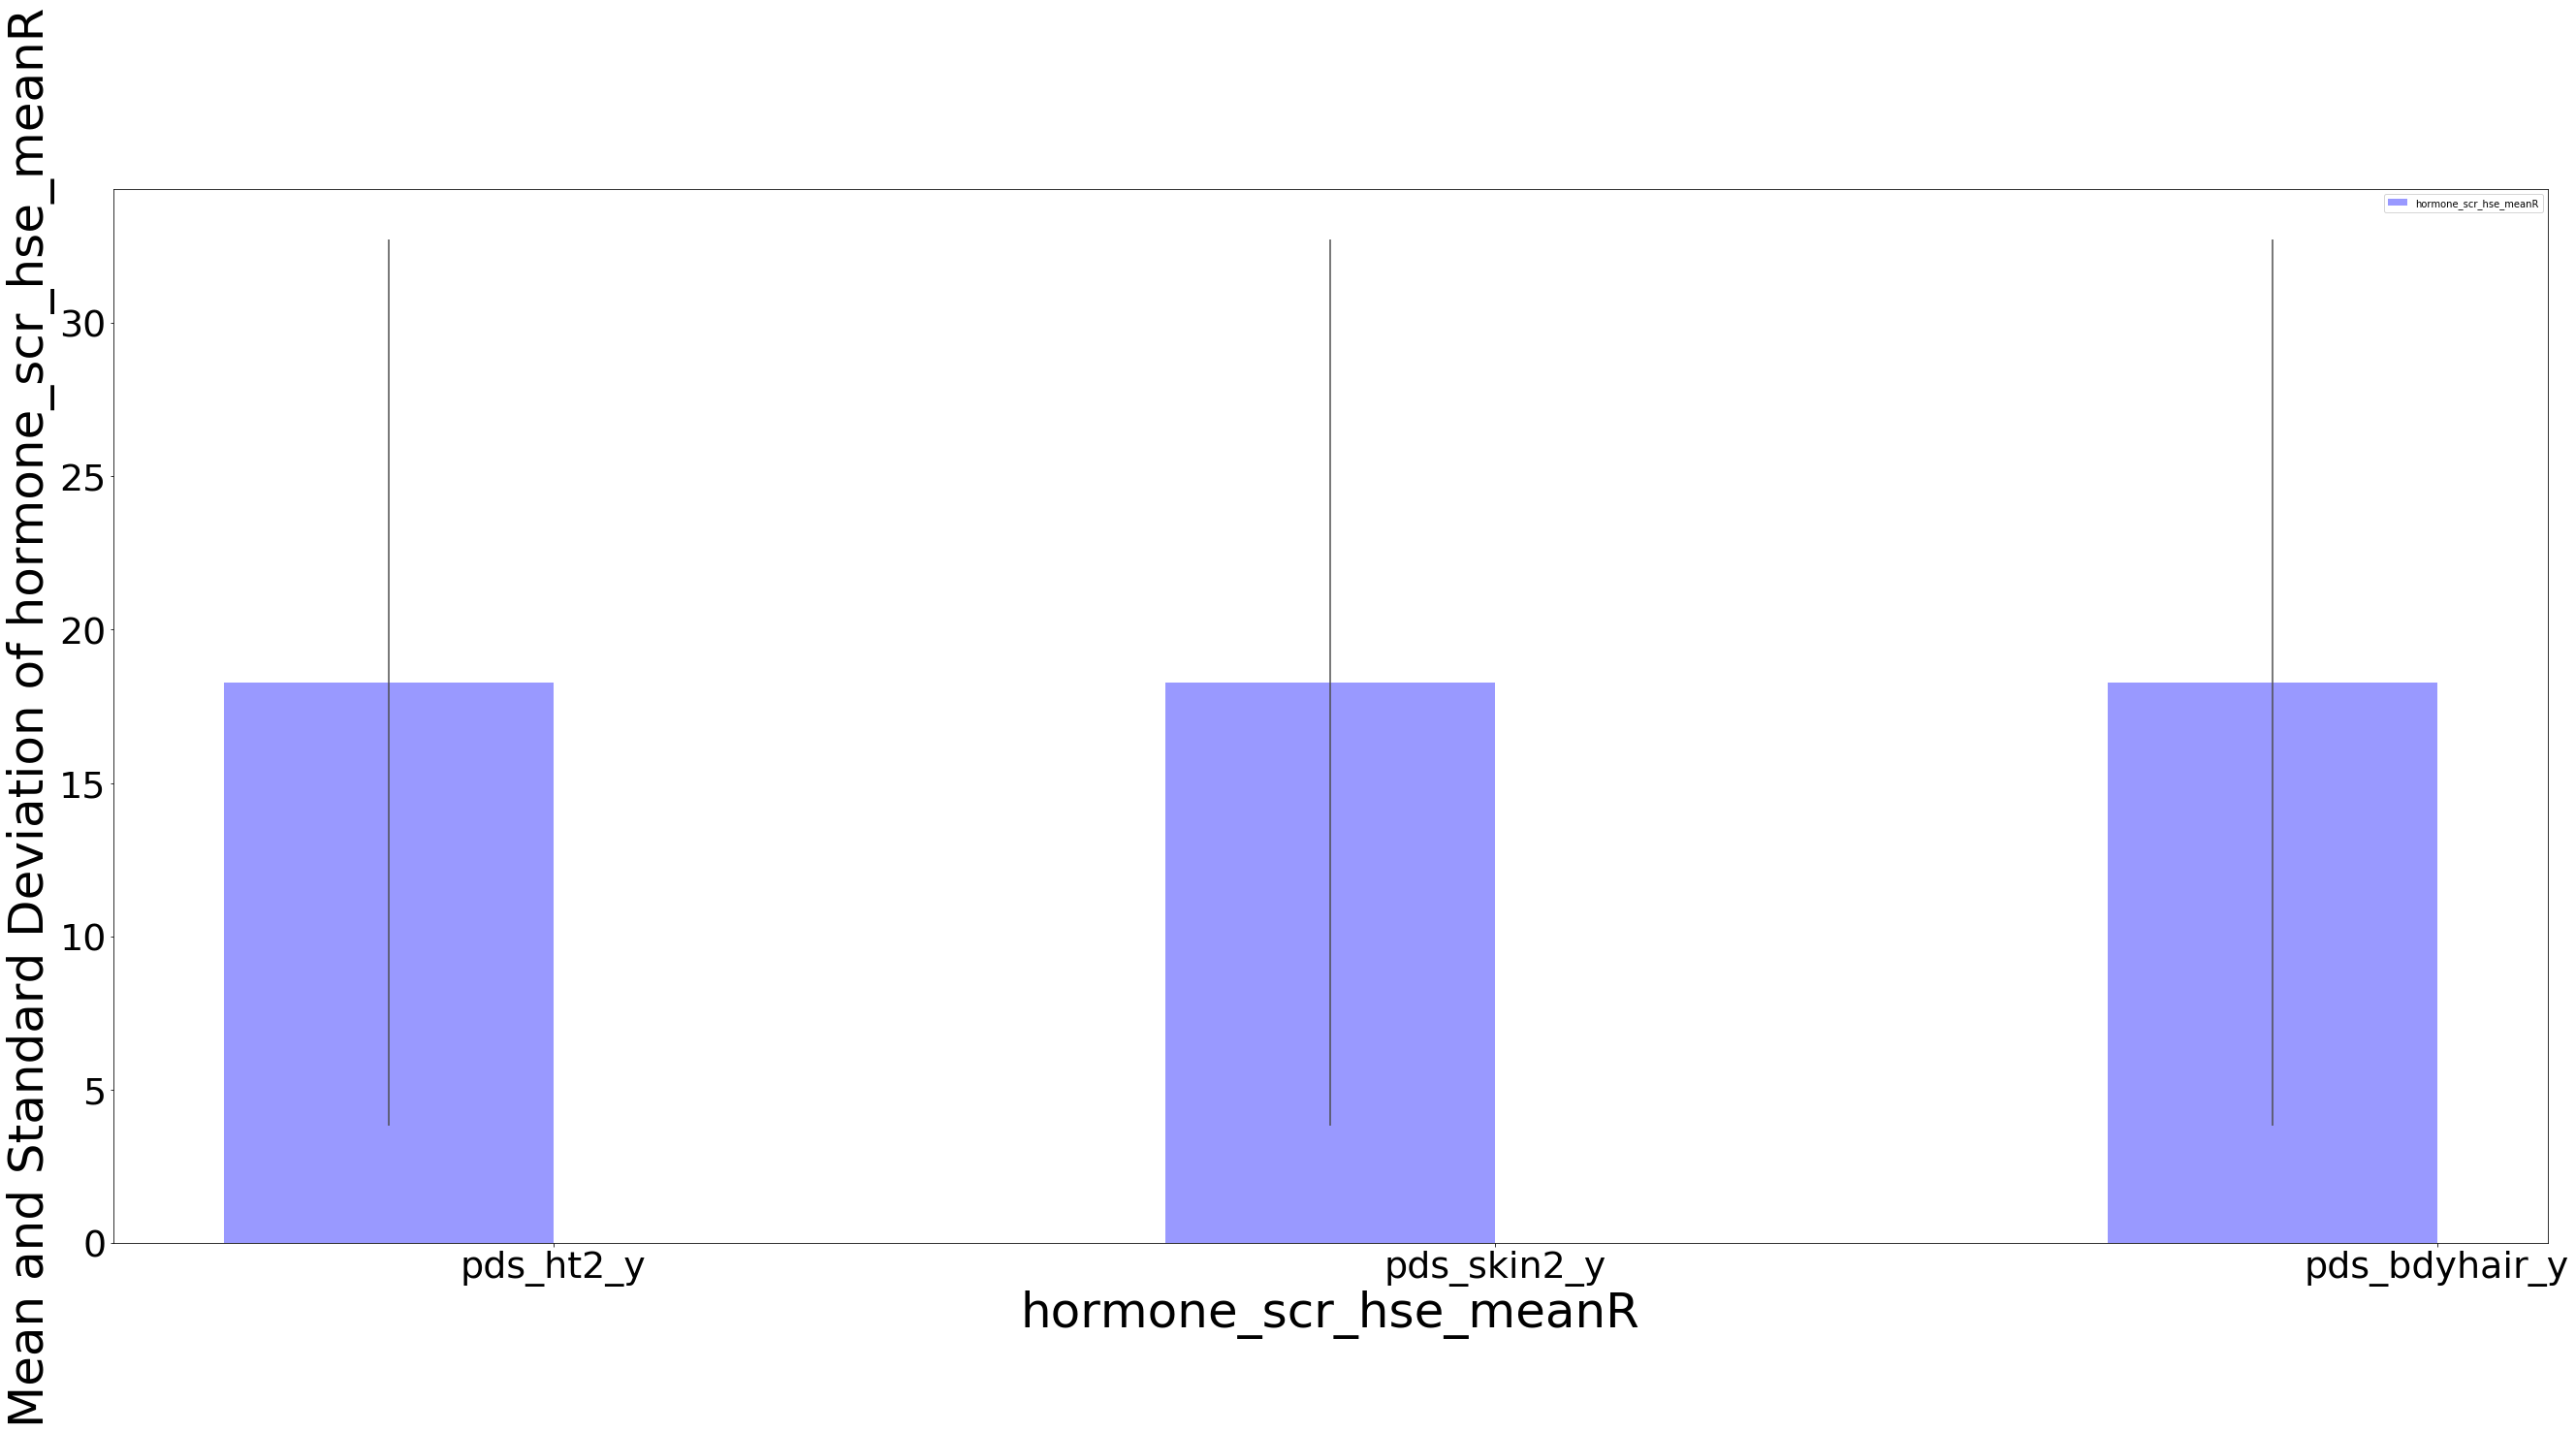

In [28]:
n_groups = 3

listOcool = ['pds_skin2_yR', 'anthro_waist_cmR', 'anthroweightcalcR', 'hormone_scr_hse_meanR']

for item in listOcool:
    means_CP1 = total_g['%s'%item].mean()
    std_CP1 = total_g['%s'%item].std()

    fig, ax = plt.subplots(figsize=(45, 20))

    index = np.arange(n_groups)
    bar_width = 0.35

    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    rects1 = ax.bar(index, means_CP1, bar_width,
                    alpha=opacity, color='b',
                    yerr=std_CP1, error_kw=error_config,
                    label=item)

    ax.set_xlabel('%s'%item, fontsize = 50)
    ax.set_ylabel('Mean and Standard Deviation of %s'%item, fontsize = 50)
    
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(names[0:12], fontsize = 28)
    ax.legend()
    ax.tick_params(labelsize = 38)

    fig=plt.figure(figsize=(100, 16), dpi= 80, facecolor='w', edgecolor='k')
    fig.tight_layout()
    plt.show()

In [32]:
total_g.to_csv('/Users/gracer/Google Drive/ABCD/important_txt/male_puberty_ana.csv', sep=',')

In [34]:
print(indexes)

NameError: name 'indexes' is not defined

want this but colored the dots each time

In [29]:
varsy =[All_clust ,All_clust_space,All_labels , All_index, All_comp, All_var_ratio,All_data, names, All_lev1Ratio, All_lev2Ratio, All_lev3Ratio, kmeans] 

In [30]:
all_vars = {}
keys = vars =['All_clust' ,'All_clust_space','All_labels' , 
              'All_index', 'All_comp', 'All_var_ratio','All_data', 
              'names',' All_lev1Ratio', 'All_lev2Ratio',' All_lev3Ratio', 'kmeans'] 

for i in range(0,len(keys)):
    all_vars[keys[i]] = varsy[i]


In [31]:
import pickle

filename = '/Users/gracer/Google Drive/ABCD/important_txt/male_data.pickle'
with open(filename, 'wb') as handle:
    pickle.dump(all_vars, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('filename.pickle', 'rb') as handle:
#     b = pickle.load(handle)

# print all_vars == b

* All_clust (180,)<- length of the subjects over all runs
* All_clust_space(180,)<-length of the subjects over all runs
* All_means(180,)<-length of the subjects
* All_labels(180,) <- length of subjects True Labels
* All_index(180,)<-length of subjects Index of the original data
* All_comp(18, 12)<- rows are the the PCA components, times the number of the levels, and the number of runs. cols are the factors
* All_var_ratio(108, 2)<-rows are the number of runs, times the number of factors, times the number of levels
* All_var(3, 6)<- rows are the number of runs, the columns are the PCA componenets times the number of levels
* All_mean(9, 12)<- rows are the number of runs by the number of levels the columns are the number of factors
* All_data(180, 14)<-rows are the number of subjects, the columns are number of factors plus the index, plus the components

* components_ : array, shape (n_components, n_features)

* explained_variance_ratio_ : array, shape (n_components,)

*  singular_values_ : array, shape (n_components,)

*  mean_ : array, shape (n_features,)

*  n_components_ : int

*  noise_variance_ : float